# Lecture 5

January 18, 2022

### Announcements

* Homework due this Wednesday
* Group member due this Sunday

### Topics

* Pandas
* Static Visualizations
    + matplotlib
    + plotnine
    + seaborn

### Data Sets

* Dogs Dataset 
* [Milk Sales Dataset](https://www.ers.usda.gov/webdocs/DataFiles/48685/fluidmilk.xlsx?v=5010.6)


### References

* Python for Data Analysis, Ch. 8, 9
* [Python Data Science Handbook][PDSH], Ch. 3, 4

[PDSH]: https://jakevdp.github.io/PythonDataScienceHandbook/
[ProGit]: https://git-scm.com/book/

### Missing Data

Pandas represents missing data with `NaN` and `None`, but these values do not exclusively mean missing data. For instance, `NaN` stands for "Not a Number" and is also the result of undefined computations. Pay attention to your data and code to determine whether values are missing or have some other meaning.

You can create `NaN` values with NumPy.

In [4]:
import numpy as np
import pandas as pd

np.nan

nan

In [5]:
df = pd.DataFrame({"x": [1, np.nan, 2], "y": np.arange(3), "z": ["x", "y", None]})
df

,x,y,z
0,1.0,0,x
1,NaN,1,y
2,2.0,2,None


Use the `.isna()` or `.isnull()` methods to detect missing values.

In [6]:
df.isna()

,x,y,z
0,False,False,False
1,True,False,False
2,False,False,True


In [7]:
df.isnull()

,x,y,z
0,False,False,False
1,True,False,False
2,False,False,True


In [8]:
(~df.isna()).sum().sum() # number not missing

7

In [9]:
df.notna().sum().sum() # number not missing

7

In [10]:
df.sum().sum()

6.0

### Data Alignment

Pandas supports vectorized operations, but elements are <b>automatically</b> aligned by index. **Beware!!** This is a major difference compared to R.

In [11]:
x = pd.Series([1, 2, 3], index = ["a", "b", "c"])
y = pd.Series([1, 2, 3, 1], index = ["b", "a", "d", "c"])

x

a    1
b    2
c    3
dtype: int64

In [12]:
y

b    1
a    2
d    3
c    1
dtype: int64

In [13]:
x * y

a    2.0
b    2.0
c    3.0
d    NaN
dtype: float64

You can use the `.reset_index()` method to reset the indexes on a series or data frame.

In [14]:
x.reset_index() # keep old index as a new column

# x.reset_index(drop = True) # throw away the old index

,index,0
0,a,1
1,b,2
2,c,3


### Reading Data

Pandas provides functions for reading (and writing) a variety of common formats. Most of their names begin with `read_`. For instance, we can read the dogs data from a CSV file:

In [18]:
dogs = pd.read_csv("dogs_full.csv")

In [19]:
# dogs.head()
dogs.head(n = 6)

,breed,group,datadog,popularity_all,popularity,lifetime_cost,intelligence_rank,longevity,ailments,price,food_cost,grooming,kids,megarank_kids,megarank,size,weight,height
0,Border Collie,herding,3.64,45,39.0,20143.0,1.0,12.52,2.0,623.0,324.0,weekly,low,1.0,29.0,medium,NaN,20.0
1,Border Terrier,terrier,3.61,80,61.0,22638.0,30.0,14.00,0.0,833.0,324.0,weekly,high,2.0,1.0,small,13.5,NaN
2,Brittany,sporting,3.54,30,30.0,22589.0,19.0,12.92,0.0,618.0,466.0,weekly,medium,3.0,11.0,medium,35.0,19.0
3,Cairn Terrier,terrier,3.53,59,48.0,21992.0,35.0,13.84,2.0,435.0,324.0,weekly,high,4.0,2.0,small,14.0,10.0
4,Welsh Springer Spaniel,sporting,3.34,130,81.0,20224.0,31.0,12.49,1.0,750.0,324.0,weekly,high,5.0,4.0,medium,NaN,18.0
5,English Cocker Spaniel,sporting,3.33,63,51.0,18993.0,18.0,11.66,0.0,800.0,324.0,weekly,high,6.0,5.0,medium,30.0,16.0


In [20]:
dogs.head(3)

,breed,group,datadog,popularity_all,popularity,lifetime_cost,intelligence_rank,longevity,ailments,price,food_cost,grooming,kids,megarank_kids,megarank,size,weight,height
0,Border Collie,herding,3.64,45,39.0,20143.0,1.0,12.52,2.0,623.0,324.0,weekly,low,1.0,29.0,medium,NaN,20.0
1,Border Terrier,terrier,3.61,80,61.0,22638.0,30.0,14.00,0.0,833.0,324.0,weekly,high,2.0,1.0,small,13.5,NaN
2,Brittany,sporting,3.54,30,30.0,22589.0,19.0,12.92,0.0,618.0,466.0,weekly,medium,3.0,11.0,medium,35.0,19.0


In [21]:
dogs.tail()

,breed,group,datadog,popularity_all,popularity,lifetime_cost,intelligence_rank,longevity,ailments,price,food_cost,grooming,kids,megarank_kids,megarank,size,weight,height
167,Weimaraner,sporting,NaN,32,NaN,NaN,21.0,NaN,1.0,562.0,NaN,weekly,high,NaN,NaN,large,NaN,25.0
168,Welsh Terrier,terrier,NaN,99,NaN,NaN,53.0,NaN,0.0,843.0,NaN,weekly,high,NaN,NaN,small,20.0,15.0
169,Wire Fox Terrier,terrier,NaN,100,NaN,NaN,51.0,13.17,0.0,668.0,NaN,NaN,NaN,NaN,NaN,small,17.5,15.0
170,Wirehaired Pointing Griffon,sporting,NaN,92,NaN,NaN,46.0,8.80,0.0,755.0,NaN,NaN,NaN,NaN,NaN,medium,NaN,22.0
171,Xoloitzcuintli,non-sporting,NaN,155,NaN,NaN,NaN,NaN,NaN,717.0,NaN,NaN,NaN,NaN,NaN,medium,NaN,16.5


### Inspecting Data

Series and data frames provide many of the same methods and attributes as NumPy arrays.

For a data frame, the `.dtypes` attribute gives the column types.

The type "object" means some non-numeric Python object, often a string.

In [22]:
dogs.dtypes

breed                 object
group                 object
datadog              float64
popularity_all         int64
popularity           float64
lifetime_cost        float64
intelligence_rank    float64
longevity            float64
ailments             float64
price                float64
food_cost            float64
grooming              object
kids                  object
megarank_kids        float64
megarank             float64
size                  object
weight               float64
height               float64
dtype: object

There are also several methods for quickly summarizing data.

In [23]:
dogs.describe()

,datadog,popularity_all,popularity,lifetime_cost,intelligence_rank,longevity,ailments,price,food_cost,megarank_kids,megarank,weight,height
count,87.000000,172.000000,87.000000,91.000000,132.000000,135.000000,148.000000,146.000000,87.000000,87.000000,87.000000,86.00000,159.000000
mean,2.603678,87.122093,44.000000,19819.538462,40.924242,10.956741,1.216216,876.815068,489.597701,43.954023,43.942529,44.97093,19.089623
std,0.570288,50.205335,25.258662,3102.475382,19.603560,1.995742,1.549810,461.172524,204.266894,25.288065,25.278153,35.52707,6.012400
min,0.990000,1.000000,1.000000,12653.000000,1.000000,6.290000,0.000000,283.000000,270.000000,1.000000,1.000000,5.00000,5.000000
25%,2.185000,43.750000,22.500000,17816.500000,27.000000,9.700000,0.000000,587.250000,324.000000,22.500000,22.500000,17.50000,14.000000
50%,2.710000,87.500000,44.000000,20087.000000,42.000000,11.290000,1.000000,795.000000,466.000000,44.000000,44.000000,35.00000,19.000000
75%,3.035000,130.250000,65.500000,21798.000000,54.250000,12.365000,2.000000,1042.250000,466.000000,65.500000,65.500000,62.50000,24.125000
max,3.640000,173.000000,87.000000,26686.000000,80.000000,16.500000,9.000000,3460.000000,1349.000000,87.000000,87.000000,175.00000,32.000000


In [24]:
# First, get the string columns ("object"), then describe
dogs.select_dtypes(include = ["object"]).describe()
dogs.select_dtypes(include = ["float64"]).describe()

,datadog,popularity,lifetime_cost,intelligence_rank,longevity,ailments,price,food_cost,megarank_kids,megarank,weight,height
count,87.000000,87.000000,91.000000,132.000000,135.000000,148.000000,146.000000,87.000000,87.000000,87.000000,86.00000,159.000000
mean,2.603678,44.000000,19819.538462,40.924242,10.956741,1.216216,876.815068,489.597701,43.954023,43.942529,44.97093,19.089623
std,0.570288,25.258662,3102.475382,19.603560,1.995742,1.549810,461.172524,204.266894,25.288065,25.278153,35.52707,6.012400
min,0.990000,1.000000,12653.000000,1.000000,6.290000,0.000000,283.000000,270.000000,1.000000,1.000000,5.00000,5.000000
25%,2.185000,22.500000,17816.500000,27.000000,9.700000,0.000000,587.250000,324.000000,22.500000,22.500000,17.50000,14.000000
50%,2.710000,44.000000,20087.000000,42.000000,11.290000,1.000000,795.000000,466.000000,44.000000,44.000000,35.00000,19.000000
75%,3.035000,65.500000,21798.000000,54.250000,12.365000,2.000000,1042.250000,466.000000,65.500000,65.500000,62.50000,24.125000
max,3.640000,87.000000,26686.000000,80.000000,16.500000,9.000000,3460.000000,1349.000000,87.000000,87.000000,175.00000,32.000000


### Aggregation

Pandas also provides several methods for aggregating data, such as `.mean()`, `.median()`, `.std()`, and `.value_counts()`. They ignore missing values by default.

In [25]:
dogs.median()

datadog                  2.71
popularity_all          87.50
popularity              44.00
lifetime_cost        20087.00
intelligence_rank       42.00
longevity               11.29
ailments                 1.00
price                  795.00
food_cost              466.00
megarank_kids           44.00
megarank                44.00
weight                  35.00
height                  19.00
dtype: float64

In [26]:
dogs["price"].median()

795.0

In [27]:
dogs["group"].value_counts() # like R's table() with 1 arg

sporting        28
terrier         28
working         27
hound           26
herding         25
toy             19
non-sporting    19
Name: group, dtype: int64

For counting one group against another (crosstabulating), use `pd.crosstab()`.

In [28]:
pd.crosstab(dogs["group"], dogs["kids"]) # like R's table() with 2+ arg

kids,high,low,medium
group,,,
herding,11,2,3
hound,8,1,6
non-sporting,7,0,4
sporting,17,1,3
terrier,9,0,9
toy,3,5,5
working,12,1,5


### Applying Functions

You can also use Pandas to apply your own aggregation functions to columns or rows.

* `.apply()` applies a function column-by-column or row-by-row.
* `.applymap()` applies a function element-by-element.

This is another way to vectorizing code, but only works for data frame.


In [29]:
def spread(x):
    # Input is a single column (or row)
    return x.max() - x.min()
    
dogs.select_dtypes(include = ["float64", "int64"]).apply(spread)

datadog                  2.65
popularity_all         172.00
popularity              86.00
lifetime_cost        14033.00
intelligence_rank       79.00
longevity               10.21
ailments                 9.00
price                 3177.00
food_cost             1079.00
megarank_kids           86.00
megarank                86.00
weight                 170.00
height                  27.00
dtype: float64

### Grouping

Use the `.groupby()` method to group data before computing aggregate statistics.

In [30]:
dogs.head()

,breed,group,datadog,popularity_all,popularity,lifetime_cost,intelligence_rank,longevity,ailments,price,food_cost,grooming,kids,megarank_kids,megarank,size,weight,height
0,Border Collie,herding,3.64,45,39.0,20143.0,1.0,12.52,2.0,623.0,324.0,weekly,low,1.0,29.0,medium,NaN,20.0
1,Border Terrier,terrier,3.61,80,61.0,22638.0,30.0,14.00,0.0,833.0,324.0,weekly,high,2.0,1.0,small,13.5,NaN
2,Brittany,sporting,3.54,30,30.0,22589.0,19.0,12.92,0.0,618.0,466.0,weekly,medium,3.0,11.0,medium,35.0,19.0
3,Cairn Terrier,terrier,3.53,59,48.0,21992.0,35.0,13.84,2.0,435.0,324.0,weekly,high,4.0,2.0,small,14.0,10.0
4,Welsh Springer Spaniel,sporting,3.34,130,81.0,20224.0,31.0,12.49,1.0,750.0,324.0,weekly,high,5.0,4.0,medium,NaN,18.0


In [31]:
dogs.groupby("group").mean()

,datadog,popularity_all,popularity,lifetime_cost,intelligence_rank,longevity,ailments,price,food_cost,megarank_kids,megarank,weight,height
group,,,,,,,,,,,,,
herding,2.732000,99.880000,43.500000,20691.818182,21.812500,11.728824,2.235294,814.941176,490.900000,40.300000,42.600000,36.666667,19.730000
hound,2.373077,104.769231,52.692308,19365.769231,54.904762,10.793529,0.833333,746.571429,514.538462,54.769231,56.153846,63.833333,22.543478
non-sporting,2.488000,82.210526,38.600000,19315.800000,46.714286,10.976000,1.352941,930.500000,409.200000,46.300000,42.800000,27.928571,14.984375
sporting,2.976000,87.428571,46.066667,20299.312500,27.782609,10.895600,1.040000,760.125000,510.866667,27.466667,17.266667,51.966667,21.276786
terrier,2.787500,100.250000,58.416667,20504.333333,44.750000,11.480000,0.653846,905.760000,389.916667,37.166667,39.583333,23.413043,13.780000
toy,2.805385,54.052632,36.769231,19506.076923,48.647059,11.672941,1.000000,686.894737,343.230769,35.076923,49.000000,9.818182,10.533333
working,2.065000,71.111111,32.285714,19164.687500,41.529412,9.465909,1.772727,1235.708333,721.500000,66.571429,62.000000,105.000000,25.388889


By default, the groups become the index. You can keep them as regular columns by setting `as_index = False` when grouping.

In [32]:
dogs.groupby("group", as_index = False).mean()

,group,datadog,popularity_all,popularity,lifetime_cost,intelligence_rank,longevity,ailments,price,food_cost,megarank_kids,megarank,weight,height
0,herding,2.732000,99.880000,43.500000,20691.818182,21.812500,11.728824,2.235294,814.941176,490.900000,40.300000,42.600000,36.666667,19.730000
1,hound,2.373077,104.769231,52.692308,19365.769231,54.904762,10.793529,0.833333,746.571429,514.538462,54.769231,56.153846,63.833333,22.543478
2,non-sporting,2.488000,82.210526,38.600000,19315.800000,46.714286,10.976000,1.352941,930.500000,409.200000,46.300000,42.800000,27.928571,14.984375
3,sporting,2.976000,87.428571,46.066667,20299.312500,27.782609,10.895600,1.040000,760.125000,510.866667,27.466667,17.266667,51.966667,21.276786
4,terrier,2.787500,100.250000,58.416667,20504.333333,44.750000,11.480000,0.653846,905.760000,389.916667,37.166667,39.583333,23.413043,13.780000
5,toy,2.805385,54.052632,36.769231,19506.076923,48.647059,11.672941,1.000000,686.894737,343.230769,35.076923,49.000000,9.818182,10.533333
6,working,2.065000,71.111111,32.285714,19164.687500,41.529412,9.465909,1.772727,1235.708333,721.500000,66.571429,62.000000,105.000000,25.388889


You can group by multiple columns.

In [33]:
dogs.groupby(["group", "kids"]).mean()

datadog  popularity_all  popularity  lifetime_cost  \
group        kids                                                          
herding      high    2.576667       96.000000   53.500000   21171.142857   
             low     3.445000       52.500000   44.000000   20269.000000   
             medium  2.485000       61.666667   13.000000   19437.000000   
hound        high    2.295000       98.250000   54.166667   20165.500000   
             low     3.190000        9.000000    9.000000   20113.000000   
             medium  2.315000       82.500000   58.500000   18441.500000   
non-sporting high    2.723333       70.714286   42.333333   20368.000000   
             medium  2.135000       42.000000   33.000000   17737.500000   
sporting     high    2.935714       70.176471   47.214286   20146.666667   
             low          NaN      161.000000         NaN            NaN   
             medium  3.540000      108.333333   30.000000   22589.000000   
terrier      high    3.024000       98.000000   57.200000   21680.600000   
             medium  2.618571       89.111111   59.285714   19664.142857   
toy          high    2.740000       19.333333   19.333333   19439.333333   
             low     2.844000       36.800000   30.800000   20409.800000   
             medium  2.806000       77.400000   53.200000   18642.400000   
working      high    1.992222       53.333333   30.111111   18153.272727   
             low     1.950000       47.000000   41.000000   20994.000000   
             medium  2.257500       57.400000   35.000000   21488.750000   

                     intelligence_rank  longevity  ailments        price  \
group        kids                                                          
herding      high            26.125000  11.702000  2.111111   848.875000   
             low              5.500000  12.095000  1.500000   576.500000   
             medium          22.500000  10.936667  5.000000   692.500000   
hound        high            56.625000  10.678571  1.000000  1028.714286   
             low             49.000000  12.630000  2.000000   423.000000   
             medium          61.666667  10.535000  1.166667   841.000000   
non-sporting high            50.428571  11.844286  0.571429   896.333333   
             medium          54.750000   9.890000  2.250000  1308.750000   
sporting     high            24.125000  10.986250  1.470588   705.875000   
             low                   NaN  11.170000  0.000000          NaN   
             medium          31.333333  11.190000  0.000000   618.000000   
terrier      high            48.875000  12.213333  0.750000   800.000000   
             medium          43.250000  11.391429  0.888889  1042.555556   
toy          high            57.000000  11.830000  1.333333   689.666667   
             low             54.400000  12.674000  1.200000   785.600000   
             medium          37.400000  11.150000  1.400000   746.000000   
working      high            48.444444   8.947273  2.300000  1292.083333   
             low             54.000000  10.160000  1.000000  1202.000000   
             medium          23.000000  10.172000  2.500000   982.000000   

                      food_cost  megarank_kids   megarank      weight  \
group        kids                                                       
herding      high    531.166667      48.833333  37.500000   31.000000   
             low     395.000000       5.000000  40.500000         NaN   
             medium  466.000000      50.000000  60.000000         NaN   
hound        high    601.500000      60.666667  49.166667   72.500000   
             low     324.000000      14.000000  54.000000   24.000000   
             medium  459.333333      55.666667  63.500000   67.000000   
non-sporting high    395.000000      39.000000  27.666667   18.000000   
             medium  430.500000      57.250000  65.500000   34.500000   
sporting     high    514.071429      29.214286  17.714286   55.791667   
             low         

On groups, the `.apply()` method computes group-by-group. It is the most general form of two other methods:

* `.agg()`, which applies a function to each group to compute summary statistics
* `.transform()`, which applies a function to each group to compute transformations (such as standardization)

In [1]:
def f(x):
    ''' Like R's browser() function, the breakpoint() function runs the debugger.
    The debugger is especially useful for checking what's going on in a function.'''
    breakpoint()
    
dogs.groupby("group").apply(f)

NameError: name 'dogs' is not defined

Python Ipdb Cheatsheet [here](https://kapeli.com/cheat_sheets/Python_Debugger.docset/Contents/Resources/Documents/index)

## Tidying a Dataset

Do Americans prefer low fat milk over whole milk?

The USDA publishes data about dairy production. We can answer the question with the [Milk Sales Dataset](https://www.ers.usda.gov/webdocs/DataFiles/48685/fluidmilk.xlsx?v=5010.6).

Many of Python's visualization packages expect [tidy data](https://vita.had.co.nz/papers/tidy-data.pdf), which means:

1. Each feature must have its own column.
2. Each observation must have its own row.
3. Each value must have its own cell.

Let's tidy up the Milk Sales Dataset so we can make a line plot that shows how milk sales have changed over time.

In [3]:
import numpy as np
import pandas as pd

In [50]:
milk = pd.read_excel("fluidmilk.xlsx", skiprows = 1)

# quantities in millions of pounds

# Rename first column and fix last column name
# Also see .rename({"Whole": "Whole Milk"})
milk.columns.values[0] = "Year"

milk.columns.values[-1] = milk.columns.values[-1].strip("1")

# Slice to get rid of extra rows at the end
milk = milk[:-3]

# Check data types
milk.dtypes

# Move columns in tidy format into the index
milk = milk.set_index("Year")

milk = milk.stack()

# You can use .reset_index() to get a regular data frame
milk = milk.reset_index()
milk.columns.values[[1, 2]] = ["Kind", "Sales"]

# MultiIndexes are convenient for subsetting the data
milk.head()

,Year,Kind,Sales
0,1975,Whole,36188.0
1,1975,Reduced-fat \n(2% milk fat),8726.0
2,1975,Low-fat \n(1% milk fat),2742.0
3,1975,Skim,2480.0
4,1975,Flavored \nwhole 1,1366.0


## Visualization in Python

We will use the plotnine package, an implementation of ggplot2 for Python. Unlike packages we've seen so far, plotnine is not included with Anaconda. To install the package:

* On Windows, run `conda install -c conda-forge plotnine` in an Anaconda Prompt (find it in the start menu)
* On MacOS or Linux, run `conda install -c conda-forge plotnine` in the Terminal

You may have to restart Jupyter after installing. To test your installation, try running

In [5]:
import plotnine

plotnine.__version__

'0.8.0'

![Python visualization landscape](img/visualization_landscape.png)
_Image from [Jake VanderPlas](https://speakerdeck.com/jakevdp/pythons-visualization-landscape-pycon-2017). See [here](https://rougier.github.io/python-visualization-landscape/landscape-colors.html) for a version with links to all of the packages!_

Our focus right now is _static_ visualization, where the visualization is a still image. So what packages should you actually use?

* __plotnine__ is convenient if you already know ggplot2. It's relatively new, so there are some bugs and missing features.

* __seaborn__ is designed specifically for making statistical plots. It's well-documented and stable. Most of the package's functions expect tidy data as input.

* __matplotlib__ is useful to know, since many other packages use matplotlib under the hood. That said, using matplotlib alone to create plots is painful; matplotlib is _low-level_, so it's flexible but simple plots may take [5 lines of code or more][ex]. The matplotlib PyPlot tools may be convenient if you already know MATLAB.

* __pandas__ provides built-in plotting functions, which can be convenient but are more limited than the packages above. They're also inconsistent about the expected format of the data.

We don't have time to exhaustively cover visualization packages for Python. You're welcome to explore other packages while doing the assignments for this class.

Later in the quarter, we'll see some of Python's _interactive_ visualization packages.

[ex]: https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/

## Jupyter and matplotlib

Jupyter notebooks can display most static visualizations and some interactive visualizations. If you're going to use visualization packages that depend on matplotlib, it's a good idea to set up your notebook by running:

In [7]:
# Initialize matplotlib

%matplotlib inline

import matplotlib.pyplot as plt

# Change the size of the plot
plt.rcParams["figure.figsize"] = [10, 8]

Matplot cheat sheet [see here][link1] 

[link1]:https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf

## Plotting the Milk Dataset with plotnine

See the [plotnine documentation](https://plotnine.readthedocs.io/en/latest/)! Also see the [ggplot2 documentation](https://ggplot2.tidyverse.org/reference/) and the [ggplot2 cheatsheet](https://www.maths.usyd.edu.au/u/UG/SM/STAT3022/r/current/Misc/data-visualization-2.1.pdf). If you run into a bug, you may want to check for a work-around on the [plotnine bug tracker](https://github.com/has2k1/plotnine/issues).

We can avoid typing `plotnine.` over and over again by importing all of plotnine's objects directly into the global namespace:

In [8]:
from plotnine import *

In [52]:
milk.head(n=10)

,Year,Kind,Sales
0,1975,Whole,36188.0
1,1975,Reduced-fat \n(2% milk fat),8726.0
2,1975,Low-fat \n(1% milk fat),2742.0
3,1975,Skim,2480.0
4,1975,Flavored \nwhole 1,1366.0
5,1975,"Flavored, \nother than whole",719.0
6,1975,Buttermilk,1011.0
7,1975,Eggnog,76.0
8,1975,Total 2,53308.0
9,1976,Whole,35241.0


Importing other packages this way is not recommended, since names of objects in a package may overlap with names of objects you've defined.


The syntax of plotnine closely follows the syntax of R's ggplot2. In R, we would write

```r
ggplot2(milk, aes(x = Year, y = Sales, color = Kind)) + geom_line() 
```

One important difference is that plotnine requires that we quote variable names.

/Users/yuchien/opt/anaconda3/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


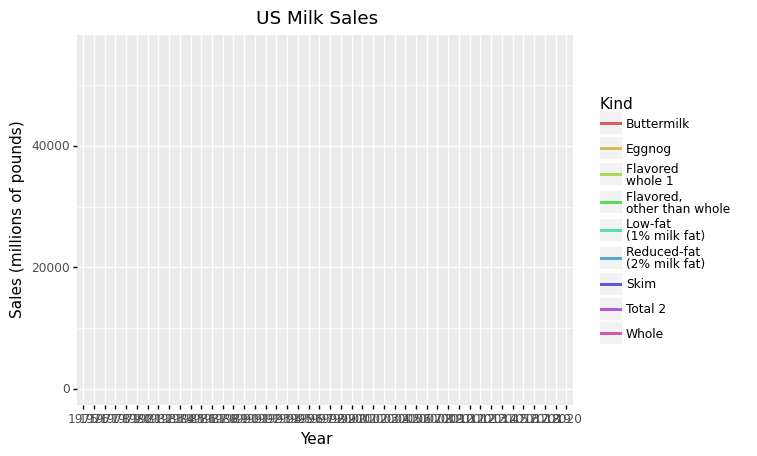

<ggplot: (8775391345098)>

In [53]:
(
    ggplot(milk, aes(x = "Year", y = "Sales", color = "Kind")) + geom_line()
    + labs(title = "US Milk Sales", y = "Sales (millions of pounds)")
)

In [54]:
milk.dtypes

Year      object
Kind      object
Sales    float64
dtype: object

In [42]:
milk['Year'] = pd.to_numeric(milk['Year'])

In [43]:
milk.dtypes

Year       int64
Kind      object
Sales    float64
dtype: object

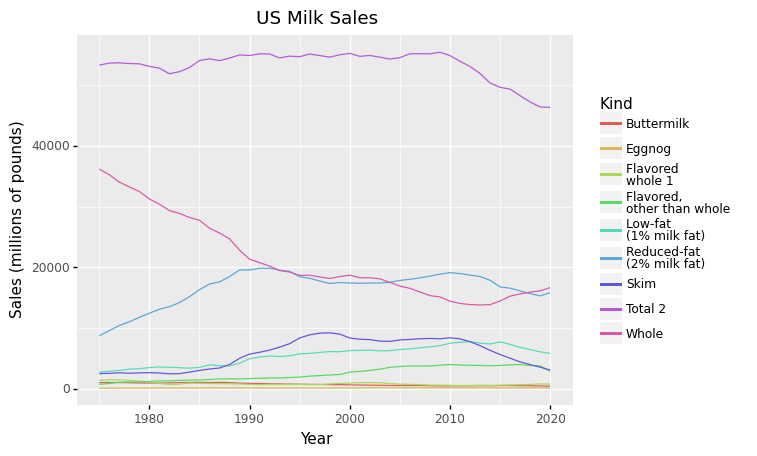

<ggplot: (8775399017111)>

In [44]:
(
    ggplot(milk, aes(x = "Year", y = "Sales", color = "Kind")) + geom_line()
    + labs(title = "US Milk Sales", y = "Sales (millions of pounds)")
)

plotnine includes the familiar `ggsave()` function for saving a visualization to an image file.

## Plotting the Milk Dataset with seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Seaborn library is included as part of the Anaconda distribution.

See the [seaborn documentation](https://seaborn.pydata.org/)!

In [56]:
import seaborn as sns

sns.__version__

'0.11.1'

In seaborn, the __hue__ parameter determines which column in the data frame should be used for colour encoding. 

Text(0.5, 1.0, 'US Milk Sales')

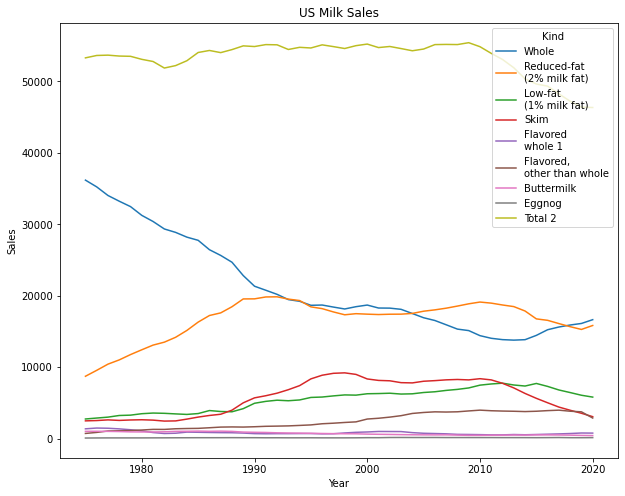

In [62]:
ax = sns.lineplot(x = "Year", y = "Sales", hue = "Kind", data = milk)
ax.set_title("US Milk Sales")

If we want to adjust the size and layout, we have to learn more about matplotlib.

## The Basics of matplotlib

See the [matplotlib documentation](https://matplotlib.org/contents.html)!

First, let's change the size of the figures in the notebook. To do that, we need to go back to the code we used to initialize matplotlib, and adjust `rcParams`, matplotlib's default settings.

### Jargon

The most important thing to know is matplotlib's jargon:

* _Figure_: Container for plots.
* _Axes_: Container for components of a plot ("primitives"). In other words, an axes is a single plot.
* _Axis_: Container for components of an axis. An axis is a single axis.
* _Tick_: A container for tick marks on an axis.

All of the containers and the primitives are called _Artists_.

### Saving Figures

You can save figures to an image file with the `.savefig()` method.

You can also get the Figure that contains an Axes with the `.get_figure()` method. So to save our seaborn plot:

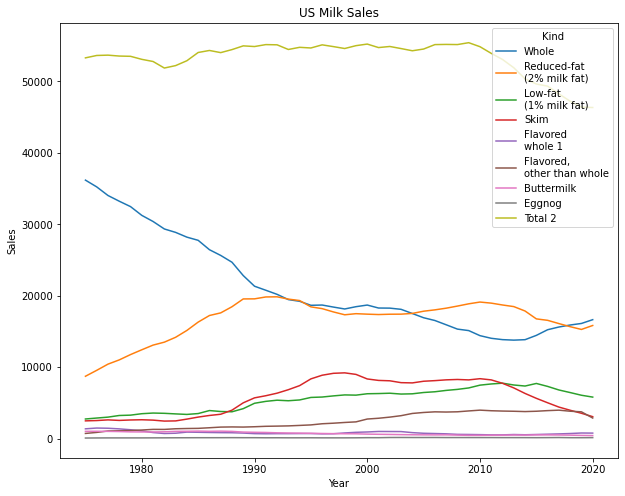

In [73]:
ax = sns.lineplot(x = "Year", y = "Sales", hue = "Kind", data = milk)
ax.set_title("US Milk Sales")

plt.savefig('seabornplot.png')

ax.get_figure().savefig('output.png')

## Comparing Packages

Let's use the familiar dogs dataset to further compare the different plotting packages.

In [75]:
dogs = pd.read_csv("dogs_full.csv")

### Dot Plots

Plot the number of dogs in each category.

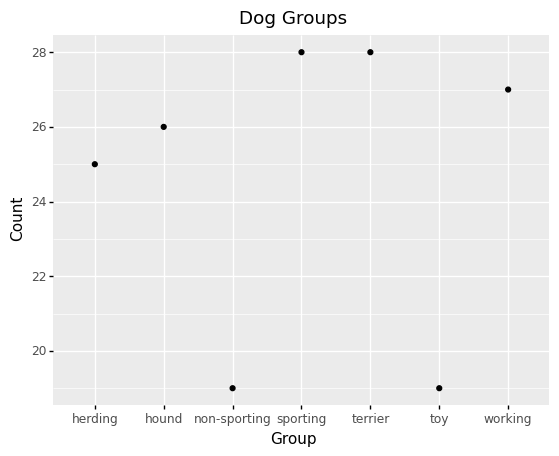

<ggplot: (8775366119385)>

In [76]:
# Plotnine

p = ggplot(dogs, aes(x = "group")) + geom_point(stat = "count")
p + labs(title = "Dog Groups", x = "Group", y = "Count")

[Text(0, 0, 'terrier'),
 Text(1, 0, 'sporting'),
 Text(2, 0, 'working'),
 Text(3, 0, 'hound'),
 Text(4, 0, 'herding'),
 Text(5, 0, 'non-sporting'),
 Text(6, 0, 'toy')]

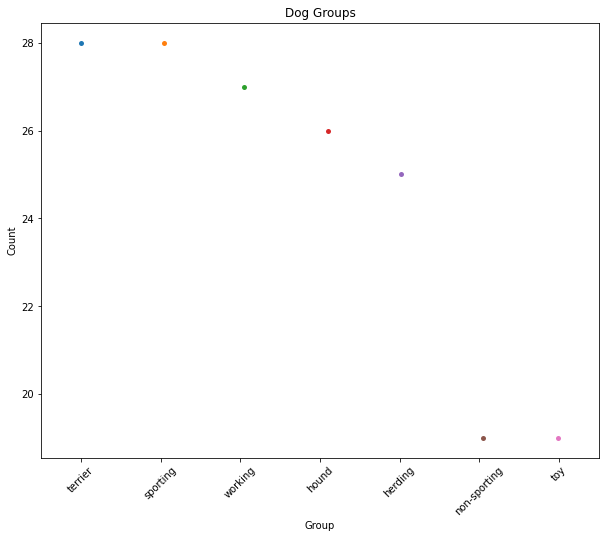

In [77]:
# Seaborn
counts = dogs["group"].value_counts()
# Pandas calls the rownames an "index"

ax = sns.stripplot(x = counts.index, y = counts)
ax.set(title = "Dog Groups", xlabel = "Group", ylabel = "Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

[Text(0.5, 1.0, 'Dog Groups'), Text(0.5, 0, 'Group'), Text(0, 0.5, 'Count')]

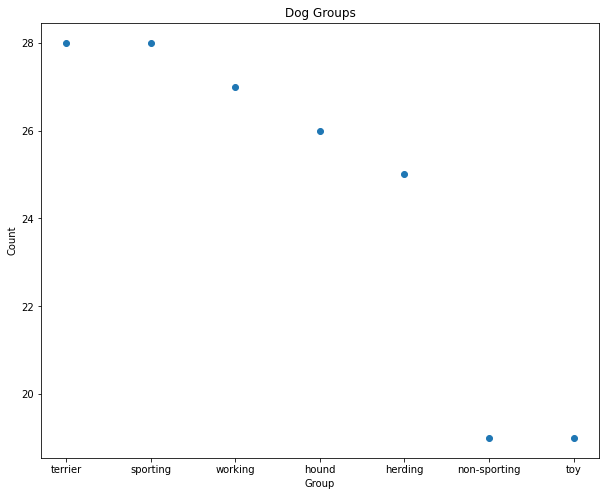

In [78]:
# Pandas
counts = dogs["group"].value_counts()

ax = counts.plot(style = "o")
ax.set(title = "Dog Groups", xlabel = "Group", ylabel = "Count")

### Box Plots

Plot the distribution of dog longevity, grouped by category.

/Users/yuchien/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 37 rows containing non-finite values.


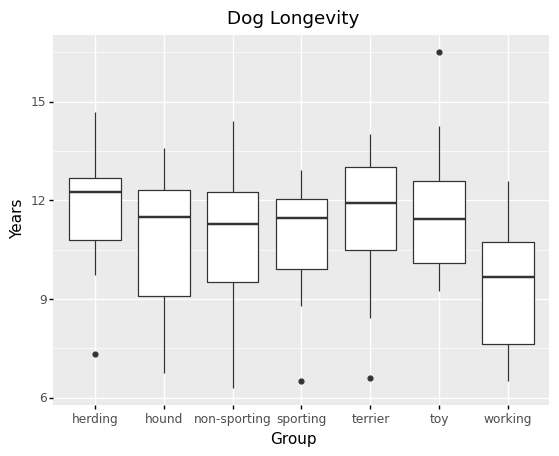

<ggplot: (8775366608095)>

In [79]:
# Plotnine

p = ggplot(dogs, aes("group", "longevity")) + geom_boxplot()
p + labs(title = "Dog Longevity", x = "Group", y = "Years")

[Text(0, 0, 'herding'),
 Text(1, 0, 'terrier'),
 Text(2, 0, 'sporting'),
 Text(3, 0, 'toy'),
 Text(4, 0, 'working'),
 Text(5, 0, 'non-sporting'),
 Text(6, 0, 'hound')]

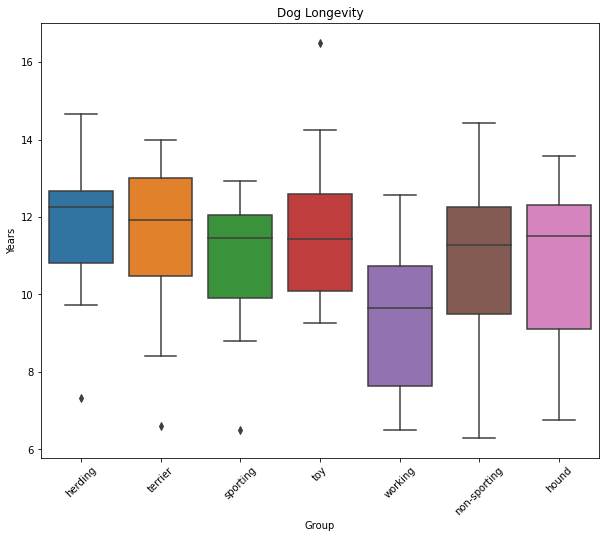

In [80]:
# Seaborn

ax = sns.boxplot(x = "group", y = "longevity", data = dogs)
ax.set(title = "Dog Longevity", xlabel = "Group", ylabel = "Years")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

Text(0.5, 0.98, '')

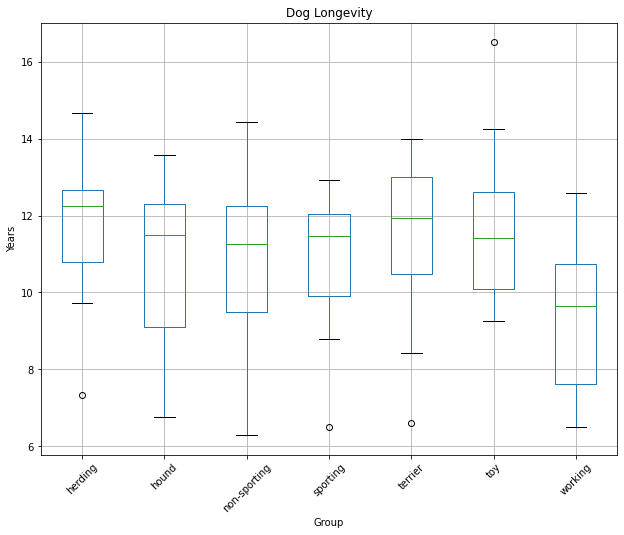

In [81]:
# Pandas

ax = dogs.boxplot(by = "group", column = "longevity", rot = 45)
# Set title and axis labels.
ax.set(title = "Dog Longevity", xlabel = "Group", ylabel = "Years")
# Hide grouping title Pandas adds.
ax.get_figure().suptitle("")

### Scatter Plots

Plot popularity against datadog score.

/Users/yuchien/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 85 rows containing missing values.


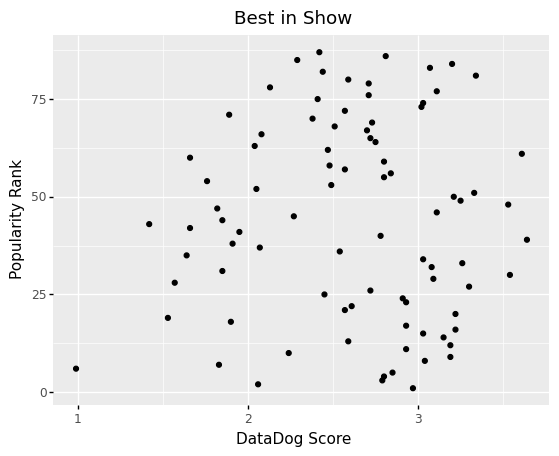

<ggplot: (8775367040835)>

In [82]:
# Plotnine

p = ggplot(dogs, aes("datadog", "popularity")) + geom_point()
p + labs(title = "Best in Show", x = "DataDog Score", y = "Popularity Rank")
# A bug in the latest version of plotnine prevents this line from working:
# p + ylim(95, -5)

(91.3, -3.3)

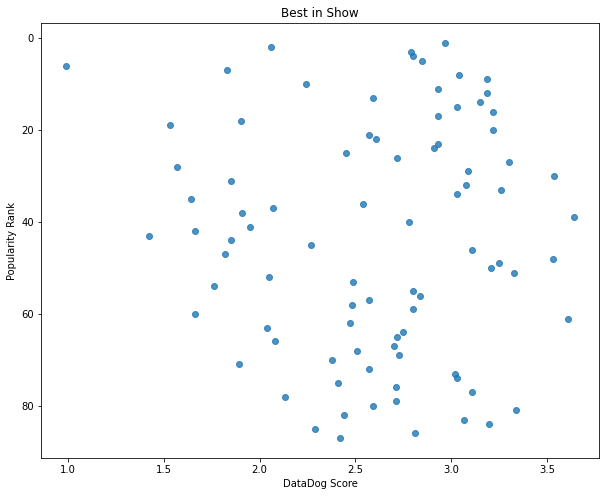

In [83]:
# Seaborn

ax = sns.regplot(x = "datadog", y = "popularity", data = dogs, fit_reg = False)
ax.set(title = "Best in Show", xlabel = "DataDog Score", ylabel = "Popularity Rank")
ylim = reversed(ax.get_ylim())
ax.set_ylim(ylim)

(91.3, -3.3)

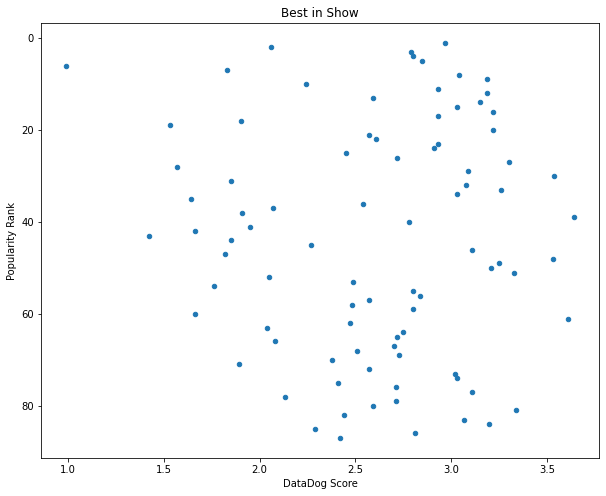

In [84]:
# Pandas

ax = dogs.plot.scatter(x = "datadog", y = "popularity")
ax.set(title = "Best in Show", xlabel = "DataDog Score", ylabel = "Popularity Rank")
ylim = reversed(ax.get_ylim())
ax.set_ylim(ylim)

## More About Packages and Modules

Which of the built-in modules are important?

Module      | Description
----------- | -----------
sys         | info about Python (version, etc)
pdb         | Python debugger
pathlib     | tools for file paths
collections | additional data structures
string      | string processing
re          | regular expressions
datetime    | date processing
urlparse    | tools for URLs
itertools   | tools for iterators
functools   | tools for functions

Python's built-in `math` and `statistics` modules are missing features we need for serious scientific computing, so we use the "SciPy Stack" instead, which includes `numpy`, `scipy`, and `pandas`.